## read in data

In [1]:
# param
version = 'v20250301'
prop = 'slope'
tgt = 'ts_slope'
space = 'normal'
output_folder = './metric/'

In [2]:
# data
import pandas as pd
import numpy as np
cal = pd.read_parquet(f'./material/data.series_cal_{version}.pq')
print(cal.shape)

(1000, 1017)


In [3]:
# covariate
covs = cal.columns[29::].values.tolist()
covs.remove('lat')
covs.remove('lon')

## feature selection

In [4]:
from model_fit import cfi_calc
cal = cal.dropna(subset = covs+[tgt])
cfi = cfi_calc(cal, tgt, prop, space, output_folder, version, covs) # produce

start bootstrap on different subset...
[14:45:16] 0 iteration, training size: 700
[14:45:20] 1 iteration, training size: 700
[14:45:24] 2 iteration, training size: 700
[14:45:29] 3 iteration, training size: 700
[14:45:33] 4 iteration, training size: 700
[14:45:37] 5 iteration, training size: 700
[14:45:41] 6 iteration, training size: 700
[14:45:45] 7 iteration, training size: 700
[14:45:49] 8 iteration, training size: 700
[14:45:54] 9 iteration, training size: 700
[14:45:58] 10 iteration, training size: 700
[14:46:02] 11 iteration, training size: 700
[14:46:06] 12 iteration, training size: 700
[14:46:10] 13 iteration, training size: 700
[14:46:14] 14 iteration, training size: 700
[14:46:19] 15 iteration, training size: 700
[14:46:23] 16 iteration, training size: 700
[14:46:27] 17 iteration, training size: 700
[14:46:31] 18 iteration, training size: 700
[14:46:35] 19 iteration, training size: 700


[14:48:36] processing 0.0 ...
[14:48:58] processing 0.0002 ...
[14:49:18] processing 0.0004 ...
[14:49:32] processing 0.0006000000000000001 ...
[14:49:42] processing 0.0008 ...
[14:49:50] processing 0.001 ...
[14:49:57] processing 0.0012000000000000001 ...
[14:50:03] processing 0.0014 ...
[14:50:08] processing 0.0016 ...
[14:50:12] processing 0.0018000000000000002 ...
[14:50:16] processing 0.002 ...
[14:50:19] processing 0.0022 ...
[14:50:22] processing 0.0024000000000000002 ...
[14:50:25] processing 0.0026000000000000003 ...
[14:50:28] processing 0.0028 ...
[14:50:30] processing 0.003 ...
[14:50:32] processing 0.0032 ...
[14:50:35] processing 0.0034000000000000002 ...
[14:50:37] processing 0.0036000000000000003 ...
[14:50:38] processing 0.0038 ...
[14:50:40] processing 0.004 ...
[14:50:42] processing 0.004200000000000001 ...
[14:50:43] processing 0.0044 ...
[14:50:45] processing 0.0046 ...
[14:50:46] processing 0.0048000000000000004 ...
[14:50:47] processing 0.005 ...
[14:50:48] proce

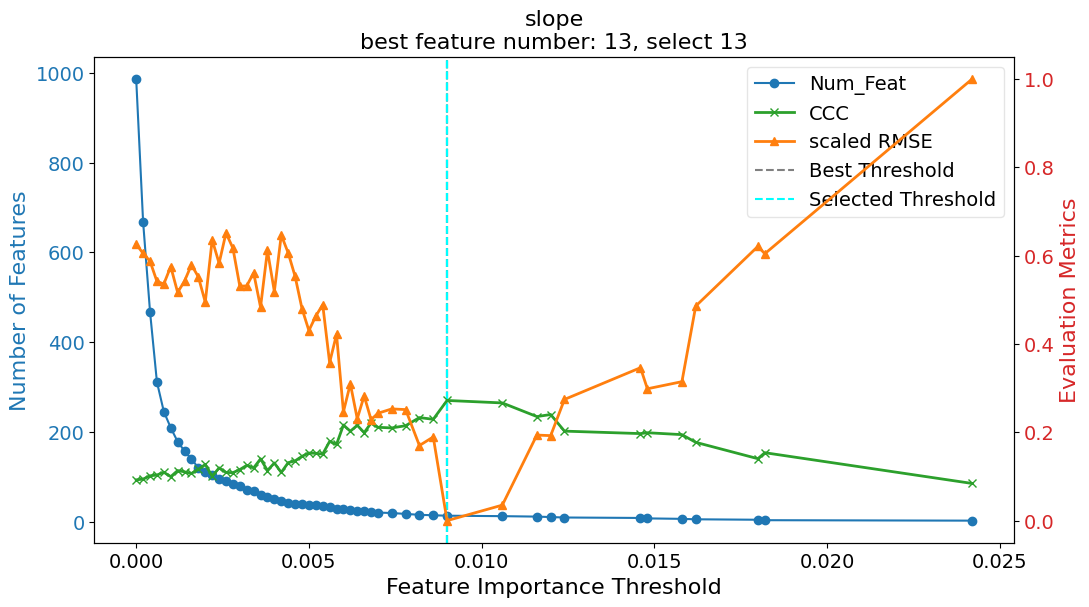

In [4]:
from model_fit import rscfi
cfi = pd.read_csv('./metric/feature_cfi_slope_v20250301.csv')
cov = rscfi(cal, tgt, prop, space, output_folder, version, covs, cfi, [10,50], step_size=0.0002) # produce

## paramter fine-tuning

In [5]:
from model_fit import parameter_fine_tuning, read_features
models, model_names = parameter_fine_tuning(cal, cov, tgt, prop, './model/', version)

[14:51:07] ----------------------rf------------------------
n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 10
max_resources_: 1000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 405
n_resources: 10
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
----------
iter: 1
n_candidates: 135
n_resources: 30
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 2
n_candidates: 45
n_resources: 90
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 15
n_resources: 270
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 5
n_resources: 810
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [6]:
models[0]


RandomForestRegressor(max_depth=30, max_features=0.3, n_estimators=120)

In [7]:
len(models[0].feature_names_in_)

13